# Importing libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing

In [3]:
X = np.arange(-100, 100, 4, dtype=np.float64)
y = X + 10

In [4]:
X.shape

(50,)

In [5]:
X = tf.constant(X)
y = tf.constant(y)

In [6]:
X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

In [11]:
print(f'Training Data : {len(X_train)*100/len(X)}%')
print(f'Testing Data : {len(X_test)*100/len(X)}%')

Training Data : 80.0%
Testing Data : 20.0%


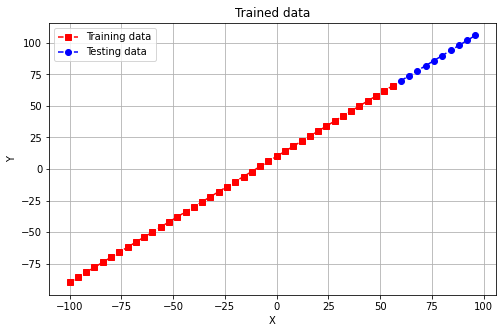

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(X_train, y_train, 'rs--', label='Training data')
plt.plot(X_test, y_test, 'bo--', label='Testing data')
plt.title('Trained data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

plt.show()

# Creating the model

In [31]:
# Set random seed
tf.random.set_seed(42)

In [32]:
# Creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

In [33]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

In [34]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 35.8233 - mae: 35.8233
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 21.7558 - mae: 21.7558
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9130 - mae: 9.9130
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5131 - mae: 11.5131
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5001 - mae: 14.5001
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 15.0784 - mae: 15.0784
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 13.2625 - mae: 13.2625
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3109 - mae: 10.3109
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 7.9467 - mae: 7.9467
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6544 - mae: 9.6544
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

# Evaluation the model

In [35]:
y_pred = model.predict(X_test)

In [36]:
err = np.zeros(len(y_test))

for i in range(len(y_test)):
    err[i] = np.abs(y_test[i] - y_pred[i])

np.mean(err)

0.5359054565429687

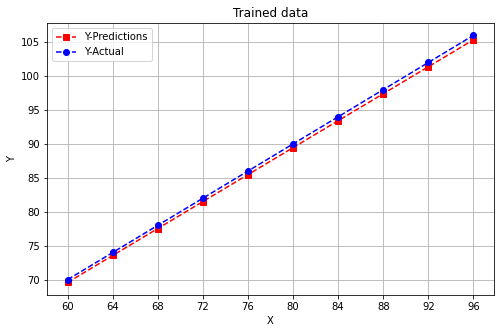

In [47]:
plt.figure(figsize=(8, 5))
plt.plot(X_test, y_pred, 'rs--', label='Y-Predictions')
plt.plot(X_test, y_test, 'bo--', label='Y-Actual')
plt.title('Trained data')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(X_test)
plt.grid()
plt.legend()

plt.show()